In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

# Making graphs in Python

There are many different libraries for creating, visualizing, and analyzing graphs in Python.  We'll be using ´networkx´, which visualizes graphs using the matplotlib engine.  To start, let's re-create our directed graph from the last assignment:

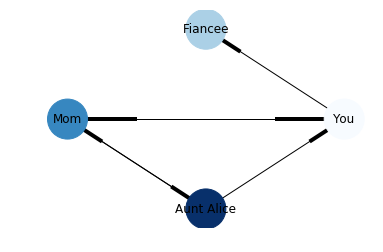

In [2]:
import networkx as nx

#Creating a directed graph
G = nx.DiGraph()
#Adding nodes.  We could have added them all in one list using .add_nodes_from()
G.add_node('You')
G.add_node('Mom')
G.add_node('Aunt Alice')
G.add_node('Fiancee')

#Adding edges.  You can also add them individually using .add_edge() 
G.add_edges_from([('You','Mom'),('You','Fiancee')])
G.add_edges_from([('Mom','You'),('Mom','Aunt Alice')])
G.add_edges_from([('Aunt Alice','Mom'),('Aunt Alice','You')])

#Drawing the graph
nx.draw_networkx(G,
                 pos=nx.circular_layout(G), # Positions the nodes relative to each other
                 node_size=1600, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(G)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()


Notice that, in lieu of arrows, directionality is indicated by thicker endcaps.  

Also note that networkx uses 'nodes' and 'edges,' thus recklessly mixing the languages of network analysis and graph theory.  Madness!  

# Node positions

In a network we are interested in the relationships between nodes as conveyed by links, but we don't have an interest in their positions in space.  When we visualize networks as graphs, however, we need to provide some guidance as to where each node should appear in the space so that we can clearly tell the nodes apart and follow the links.

We used the circular layout above, which organizes all the nodes in a circular ring around a central point. We could also try the 'spring' layout, which positions nodes with connections to each other close together and nodes without connections to each other farther apart:

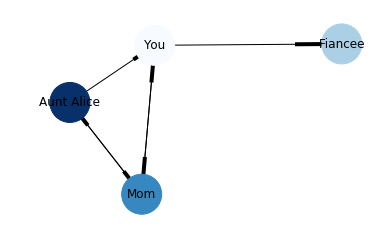

In [3]:
nx.draw_networkx(G,
                 pos=nx.spring_layout(G), # Positions the nodes relative to each other
                 node_size=1600, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(G)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()

There are many other options in networkx [see the Graph Layout subsection](https://networkx.github.io/documentation/networkx-1.10/reference/drawing.html).  The one you choose depends on the nature of your network and your goals for the visualization.

# Working with a graph

Now that we have a graph, we can extract information about it:

In [8]:
print("This graph has {} nodes and {} edges.".format(G.number_of_nodes(),G.number_of_edges()))

print('The "Aunt Alice" node has an in-degree of {} and an out-degree of {}.'.format(G.in_degree('Aunt Alice'),G.out_degree('Aunt Alice')))

print("The nodes are {}.".format(G.nodes()))

print("The edges are {}.".format(G.edges()))

print("The betweenness centrality scores are {}".format(nx.betweenness_centrality(G)))

print('The node degrees are {}.'.format(G.degree()))


This graph has 4 nodes and 6 edges.
The "Aunt Alice" node has an in-degree of 1 and an out-degree of 2.
The nodes are ['You', 'Fiancee', 'Mom', 'Aunt Alice'].
The edges are [('You', 'Fiancee'), ('You', 'Mom'), ('Mom', 'You'), ('Mom', 'Aunt Alice'), ('Aunt Alice', 'You'), ('Aunt Alice', 'Mom')].
The betweenness centrality scores are {'You': 0.3333333333333333, 'Fiancee': 0.0, 'Mom': 0.16666666666666666, 'Aunt Alice': 0.0}
The node degrees are {'You': 4, 'Fiancee': 1, 'Mom': 4, 'Aunt Alice': 3}.


## Hubs

It is apparent that the "You" node is the hub of the network, with a high degree (4) and the highest betweenness centrality score (.33).  That node touches many other nodes, and is part of the shortest path between many nodes.  If we wanted to disseminate information throughout the network, it would be a good idea to start by telling "You."

## Paths

We can compute the lengths of all the simple paths between nodes.  The return is a dictionary of pairwise node connectivity, giving the starting node and a list of all ending nodes with the length of the simple path connecting each starting/ending pair.  

Similarly, we can get a list of all the shortest paths.  The return is a dictionary of dictionaries formatted such that `source : { target1=[list of nodes in path], target2=[list of nodes in path]}`.

In [9]:
print("Simple paths:",nx.all_pairs_node_connectivity(G),'\n')
print("Shortest paths:", nx.all_pairs_shortest_path(G))

Simple paths: {'You': {'Fiancee': 1, 'Mom': 1, 'Aunt Alice': 1}, 'Fiancee': {'You': 0, 'Mom': 0, 'Aunt Alice': 0}, 'Mom': {'You': 2, 'Fiancee': 1, 'Aunt Alice': 1}, 'Aunt Alice': {'You': 2, 'Fiancee': 1, 'Mom': 2}} 

Shortest paths: {'You': {'You': ['You'], 'Fiancee': ['You', 'Fiancee'], 'Mom': ['You', 'Mom'], 'Aunt Alice': ['You', 'Mom', 'Aunt Alice']}, 'Fiancee': {'Fiancee': ['Fiancee']}, 'Mom': {'You': ['Mom', 'You'], 'Fiancee': ['Mom', 'You', 'Fiancee'], 'Mom': ['Mom'], 'Aunt Alice': ['Mom', 'Aunt Alice']}, 'Aunt Alice': {'You': ['Aunt Alice', 'You'], 'Fiancee': ['Aunt Alice', 'You', 'Fiancee'], 'Mom': ['Aunt Alice', 'Mom'], 'Aunt Alice': ['Aunt Alice']}}


# Modifying graphs

We can convert a directed graph to an undirected one:

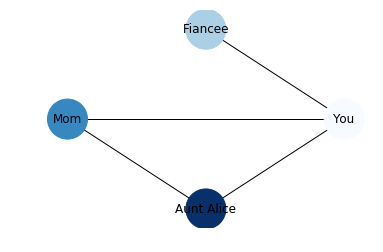

This graph has 4 nodes and 4 edges.
The "Aunt Alice" node has a degree of 2.
The nodes are ['You', 'Fiancee', 'Mom', 'Aunt Alice'].
The edges are [('You', 'Fiancee'), ('You', 'Mom'), ('You', 'Aunt Alice'), ('Mom', 'Aunt Alice')].
The clustering coefficients are: {'You': 0.3333333333333333, 'Fiancee': 0.0, 'Mom': 1.0, 'Aunt Alice': 1.0}
The betweenness centrality scores are {'You': 0.6666666666666666, 'Fiancee': 0.0, 'Mom': 0.0, 'Aunt Alice': 0.0}
The degree centrality scores are {'You': 3, 'Fiancee': 1, 'Mom': 2, 'Aunt Alice': 2}


In [11]:
# Converting to an undirected graph
UG=G.to_undirected()

#Drawing the new graph
nx.draw_networkx(UG,
                 pos=nx.circular_layout(UG), # Positions the nodes relative to each other
                 node_size=1600, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(G)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()

print("This graph has {} nodes and {} edges.".format(UG.number_of_nodes(),UG.number_of_edges()))

print('The "Aunt Alice" node has a degree of {}.'.format(UG.degree('Aunt Alice')))

print("The nodes are {}.".format(UG.nodes()))

print("The edges are {}.".format(UG.edges()))

#Note that networkx does not have defined clustering algorithms for directed graphs.
print("The clustering coefficients are: {}".format(nx.clustering(UG)))
print("The betweenness centrality scores are {}".format(nx.betweenness_centrality(UG)))
print("The degree centrality scores are {}".format(nx.degree(UG)))

The 'You' node continues to be the hub of the network.  Interestingly, when direction is removed from consideration, the 'Mom' node declines in betweenness centrality.  The 'Mom' node was important in the digraph because it was the only way to get information to the 'Aunt Alice' node.  Without directed edges, information can flow freely between 'Aunt Alice' and 'You', making the 'Mom' node less important.  This is also reflected in the high clustering score for the 'Mom' node.

## Modifying nodes and edges

If you drop a node, all its edges are dropped as well:

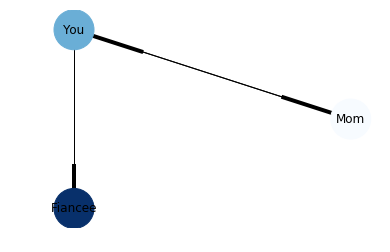

[('Mom', 'You'), ('You', 'Mom'), ('You', 'Fiancee')]


In [10]:
small_G=G.copy()
small_G.remove_node('Aunt Alice')
nx.draw_networkx(small_G,pos=nx.circular_layout(small_G),node_size=1600, cmap=plt.cm.Blues,
        node_color=range(len(small_G)))
plt.axis('off')
plt.show()

print(small_G.edges())



# Weights

Edges can do more than convey that two nodes are linked.  They can also show the strength of the link, through weights.  Let's add some weights to our undirected graph.  We'll code weight through color, with stronger weights in darker shades.

The clustering coefficients are: {'You': 0.03333333333333334, 'Fiancee': 0.0, 'Mom': 0.10000000000000002, 'Aunt Alice': 0.10000000000000002}
The betweenness centrality scores are {'You': 1.0, 'Fiancee': 0.0, 'Mom': 0.0, 'Aunt Alice': 0.0}
The degree centrality scores are {'You': 8.1, 'Fiancee': 7, 'Mom': 11, 'Aunt Alice': 10.1}


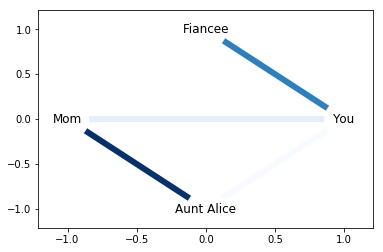

In [15]:
weighted_UG=UG.copy()

#Adding weights reflecting that Aunt Alice and Mom talk more than once a day
weighted_UG['Aunt Alice']['Mom']['weight'] = 10
#Adding a weight reflecting that You and Mom text once a week
weighted_UG['You']['Mom']['weight'] = 1
#Adding a weight reflecting that Aunt Alice almost never talks to You
weighted_UG['Aunt Alice']['You']['weight'] = .1
#Adding a weight reflecting that You talk to your fiancee every day
weighted_UG['You']['Fiancee']['weight'] = 7

#Extracting edges and weights into two lists
edges,weights=zip(*nx.get_edge_attributes(weighted_UG,'weight').items())
nx.draw_networkx(weighted_UG,
                 pos=nx.circular_layout(weighted_UG),
                 node_size=1600,
                 node_color="white", 
                 edgelist=edges, #Ordering the edges so that the weights list works
                 edge_color=weights, #Weights
                 width=6.0, 
                 edge_cmap=plt.cm.Blues) #Darker colors indicate higher weights

#Note that to incorporate weights into most calculations in networkx, you need to specify the name of the weight attribute.
print("The clustering coefficients are: {}".format(nx.clustering(weighted_UG, weight='weight')))
print("The betweenness centrality scores are {}".format(nx.betweenness_centrality(weighted_UG, weight='weight')))
print("The degree centrality scores are {}".format(nx.degree(weighted_UG, weight='weight')))

Changing the weights changes the pattern of information exchange among the nodes.  While the 'You' node is still a hub for through traffic (due to high betweenness centrality), the strong connection between 'Mom' and 'Aunt Alice' has boosted the degree centrality of each and made 'Mom' a hub as well.

# Attributes

Weights are a specialized incidence of ´attributes´, characteristics that can be assigned to graphs, nodes, or edges.  This is a way for a graph to carry more information inside it.  For example, we could add a 'name' attribute to each node giving each person's first name.  These attributes won't show up when you visualize the network, but can be useful when you want to know why certain nodes are near one another.

In [16]:
G.node['You']='Fred'
G.node['Aunt Alice']='Alice'
G.node['Mom']='Brunhilde'
G.node['Fiancee']='Mary'

# Drill: Exploring a Graph

Take [this graph file](assets/graph.gml) and discover the following:

1. Number of nodes: 
2. Number of edges: 
3. Is the graph directed or undirected? 
4. Which node has the highest degree? 
5. Average clustering coefficient (if possible):
6. The nodes with the three highest betweenness centrality scores, and their scores: 

Also experiment with various ways to draw the network.
